In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

link to dataset: 
https://www.kaggle.com/dipam7/student-grade-prediction

In [2]:
data = pd.read_csv('data/student-mat_cleaned.csv')
data.head()

,school,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,...,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
0,GP,2,0,yes,no,no,no,yes,yes,no,...,4,3,4,1,1,3,6,5,6,6
1,GP,2,0,no,yes,no,no,no,yes,yes,...,5,3,3,1,1,3,4,5,5,6
2,GP,2,3,yes,no,yes,no,yes,yes,yes,...,4,3,2,2,3,3,10,7,8,10
3,GP,3,0,no,yes,yes,yes,yes,yes,yes,...,3,2,2,1,1,5,2,15,14,15
4,GP,2,0,no,yes,yes,no,yes,yes,no,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               395 non-null    object
 1   studytime            395 non-null    int64 
 2   failures             395 non-null    int64 
 3   schoolsup            395 non-null    object
 4   famsup               395 non-null    object
 5   paid                 395 non-null    object
 6   activities           395 non-null    object
 7   nursery              395 non-null    object
 8   higher               395 non-null    object
 9   internet             395 non-null    object
 10  romantic             395 non-null    object
 11  famrel               395 non-null    int64 
 12  freetime             395 non-null    int64 
 13  goout                395 non-null    int64 
 14  Dalc                 395 non-null    int64 
 15  Walc                 395 non-null    int64 
 16  health  

In [4]:
data.shape

(395, 21)

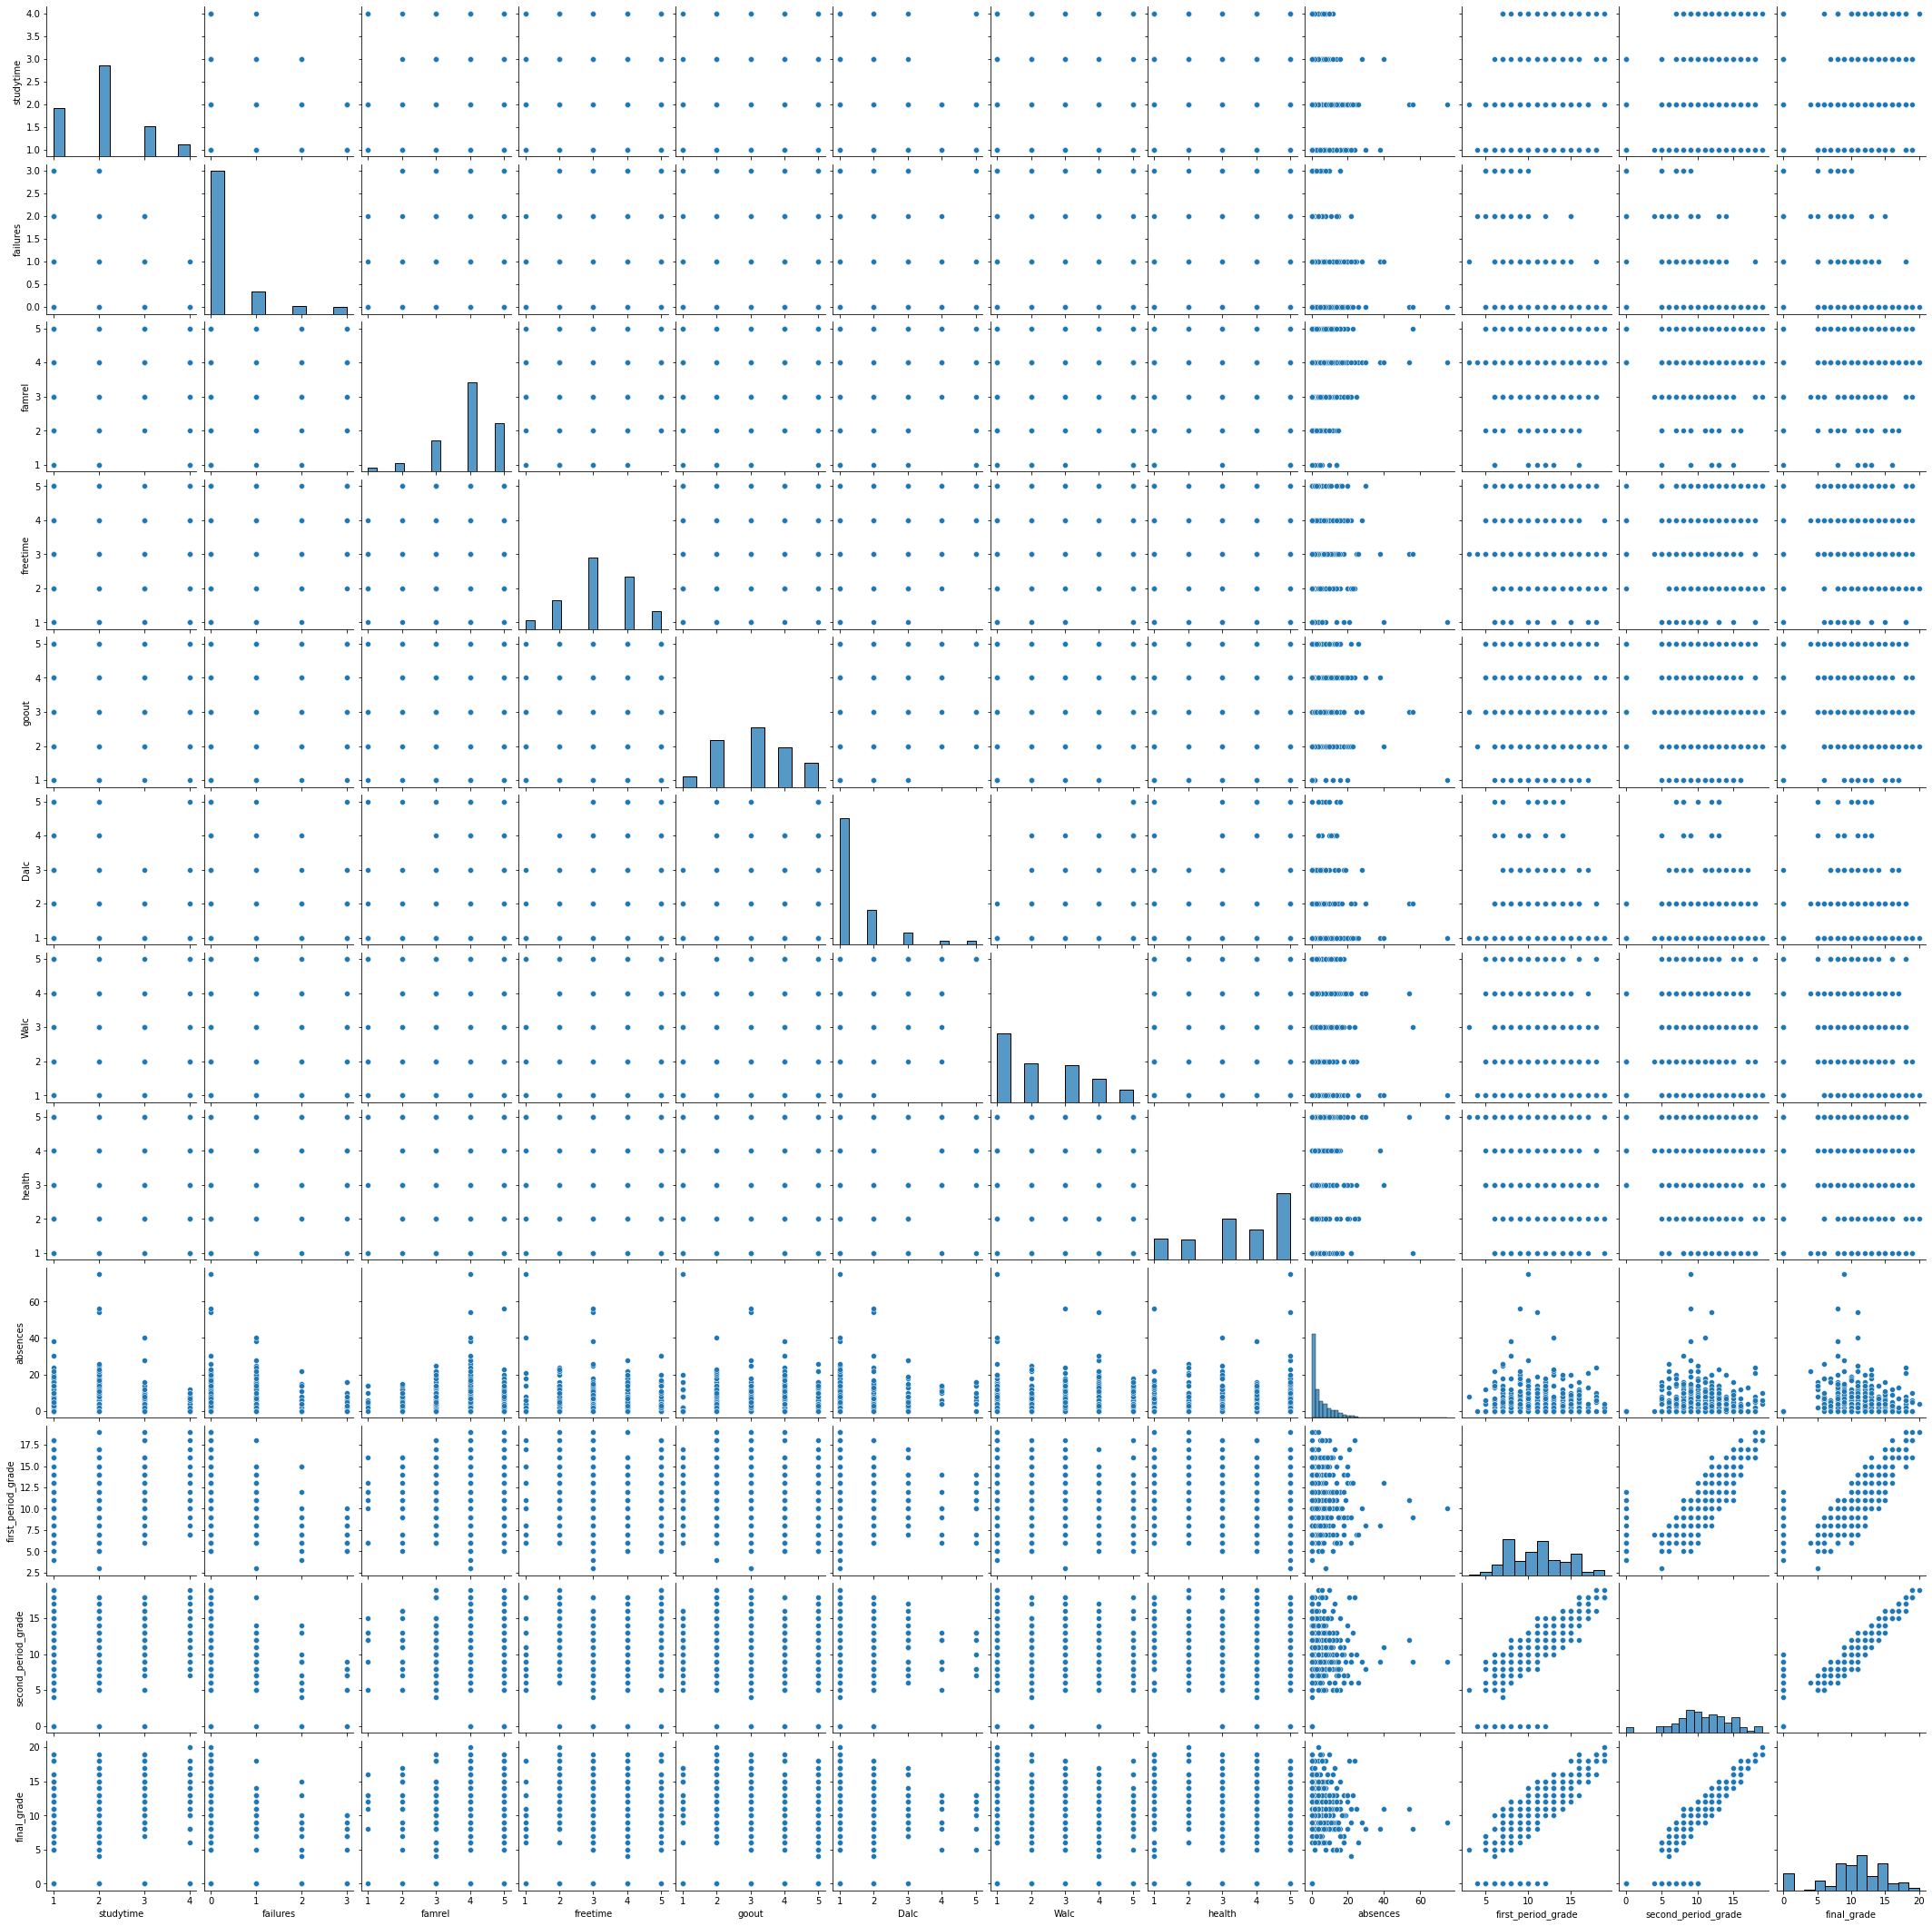

In [5]:
# Make a pairplot of the data
sns.pairplot(data)

<AxesSubplot:>

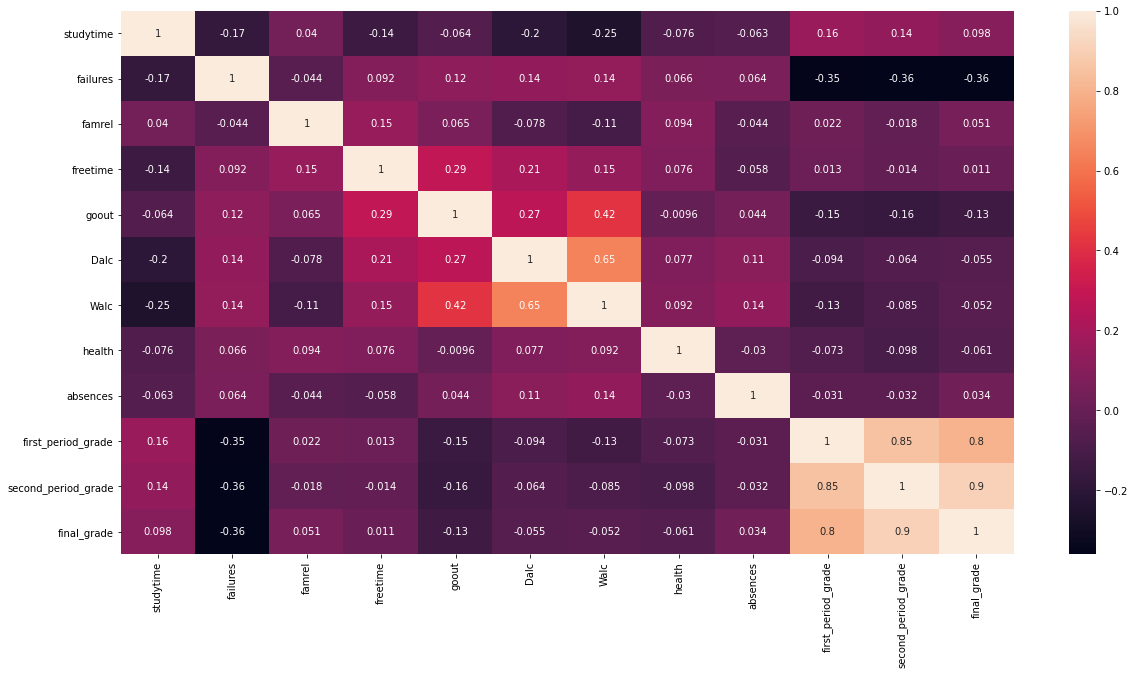

In [6]:
# Make a heatmap of the data
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)

**There seems to be a strong correlation between first/second period grade and final grade**

array([[<AxesSubplot:title={'center':'final_grade'}>]], dtype=object)

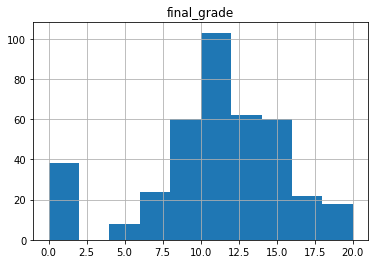

In [7]:
# Making a histogram of the final_grade variable.
data.hist(column="final_grade")

In [8]:
# Get statistical summary of the final grade variable 
data["final_grade"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: final_grade, dtype: float64

In [9]:
# Get the number of occurences of final grades
data["final_grade"].value_counts(dropna=False)

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
4      1
20     1
Name: final_grade, dtype: int64

**Look into dropping the rows with final grade values of zero!!!**

<AxesSubplot:xlabel='first_period_grade', ylabel='final_grade'>

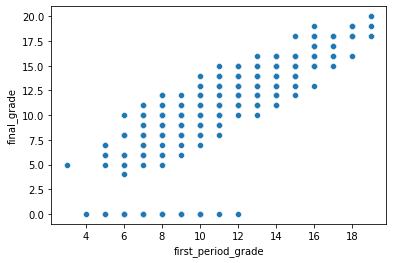

In [10]:
# Plot a scatterplot for first period grade against final grade
sns.scatterplot(x="first_period_grade", y="final_grade", data=data)

<AxesSubplot:xlabel='first_period_grade', ylabel='final_grade'>

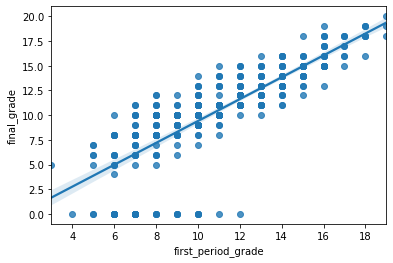

In [11]:
# Plot regplot for first period grade against final grade
sns.regplot(x="first_period_grade", y="final_grade", data=data)

<AxesSubplot:xlabel='second_period_grade', ylabel='final_grade'>

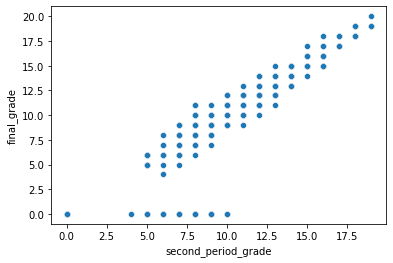

In [12]:
# Plot a scatterplot for second period grade against final grade
sns.scatterplot(x="second_period_grade", y="final_grade", data=data)

<AxesSubplot:xlabel='second_period_grade', ylabel='final_grade'>

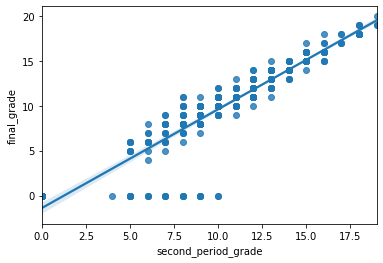

In [13]:
sns.regplot(x="second_period_grade", y="final_grade", data=data)

**Modelling**

In [14]:
X = data[["first_period_grade"]] 
y = data[["final_grade"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [15]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(296, 1) (296, 1)
(99, 1) (99, 1)


In [16]:
rModel = linear_model.LinearRegression(normalize=True)
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [17]:
# Evaluate the model  
print(rModel.score(X_train, y_train))

0.6597200099938846


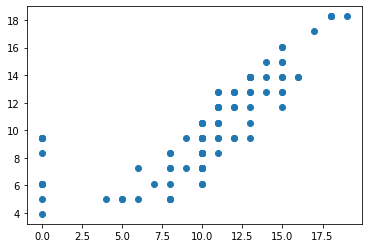

In [18]:
y_pred = rModel.predict(X_test)
plt.scatter(y_test,y_pred)

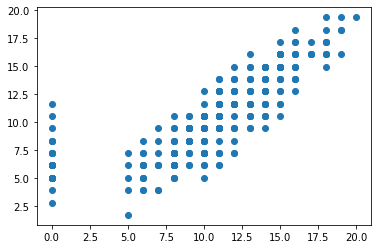

In [19]:
y_train_pred = rModel.predict(X_train)
plt.scatter(y_train, y_train_pred)

In [50]:
#Compare real data with predicted data
print('Actual Data')
print(y_train[:5])
print('\n Predicted Data')
print(y_train_pred[:5])

print('\n Actual Test Data')
print(y_test[:5])
print('\n Predicted Test Data')
print(y_pred[:5])

Actual Data
     final_grade
309           10
53            11
369           11
87            14
302           14

 Predicted Data
[[11.65058338]
 [ 7.23786861]
 [13.85694076]
 [12.75376207]
 [14.96011945]]

 Actual Test Data
     final_grade
360           13
27            15
108           13
375           10
358           10

 Predicted Test Data
[[12.75376207]
 [14.96011945]
 [ 9.44422599]
 [ 7.23786861]
 [ 9.44422599]]


**Categorical Variables**

In [73]:
column_order = ['no', 'yes']

**Studytime:**

<AxesSubplot:xlabel='studytime', ylabel='final_grade'>

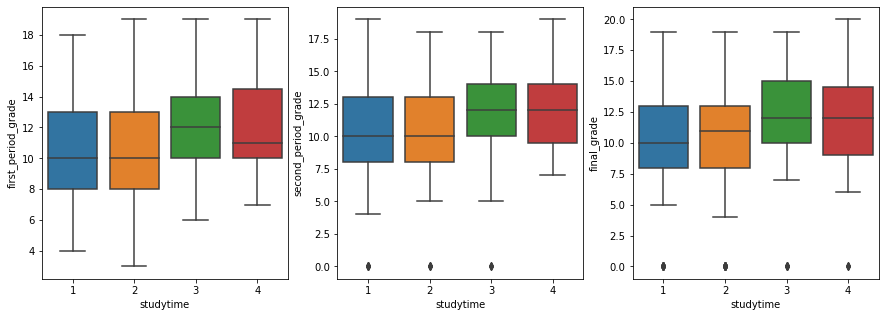

In [70]:
#Look into relationship between study time and final grade
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='studytime', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='studytime', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='studytime', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='studytime', ylabel='final_grade'>

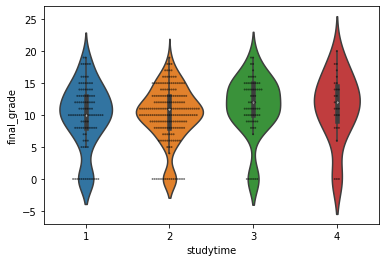

In [39]:
sns.violinplot(data = data, x='studytime', y='final_grade')
sns.swarmplot(data = data, x='studytime', y='final_grade', size=2, color='k', alpha=0.5)

<AxesSubplot:xlabel='studytime', ylabel='count'>

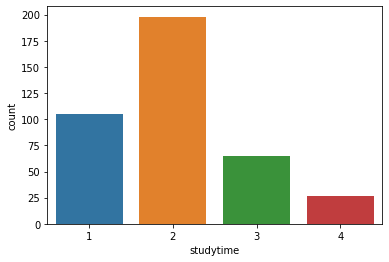

In [40]:
sns.countplot(data = data, x = 'studytime')

**Internet Access:**

<AxesSubplot:xlabel='internet', ylabel='final_grade'>

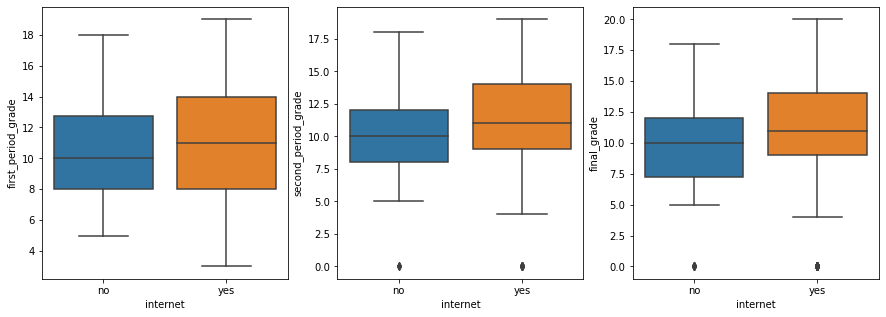

In [67]:
#Impact of internet access on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='internet', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='internet', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='internet', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='schoolsup', ylabel='final_grade'>

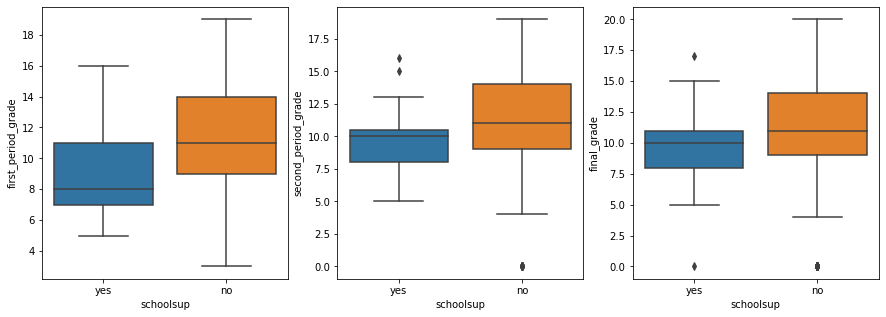

In [77]:
#Impact of extra education support on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='schoolsup', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='schoolsup', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='schoolsup', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='famsup', ylabel='final_grade'>

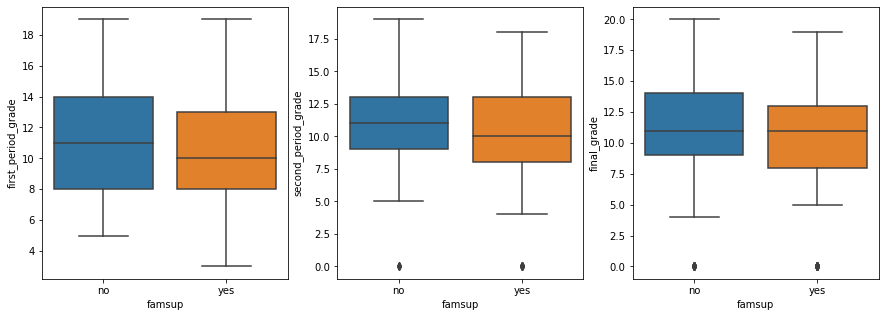

In [66]:
#Impact of family education support on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='famsup', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='famsup', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='famsup', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='paid', ylabel='final_grade'>

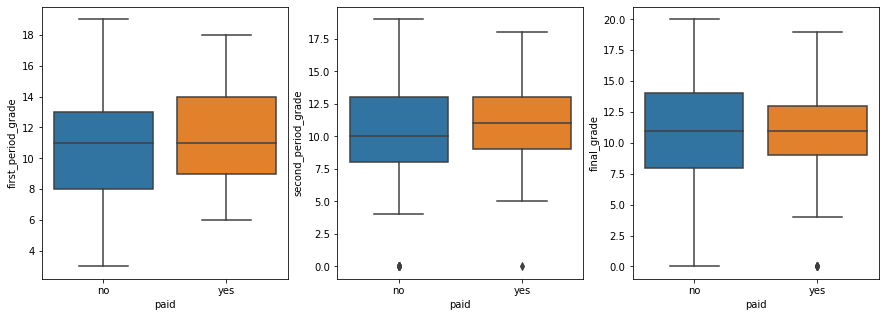

In [68]:
#Impact of getting paid classes on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='paid', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='paid', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='paid', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='activities', ylabel='final_grade'>

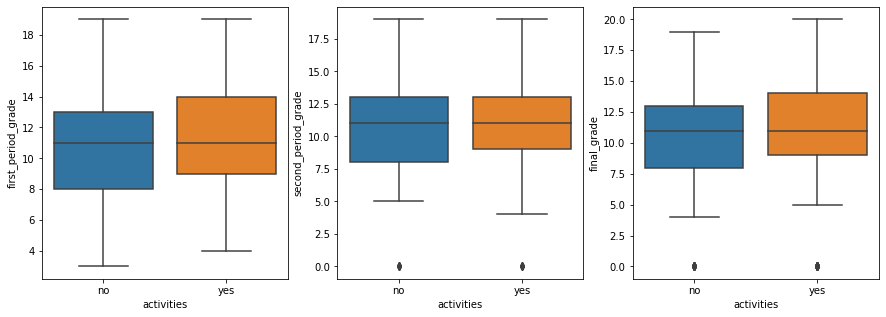

In [69]:
#Impact of extracurricular activies on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='activities', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='activities', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='activities', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='nursery', ylabel='final_grade'>

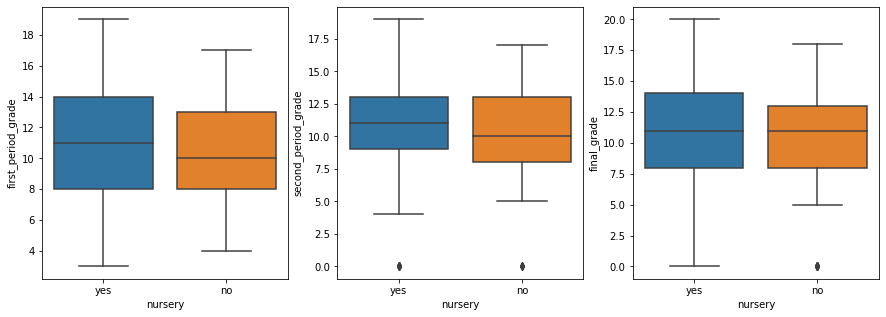

In [71]:
#Impact of attending nursery school on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='nursery', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='nursery', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='nursery', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='higher', ylabel='final_grade'>

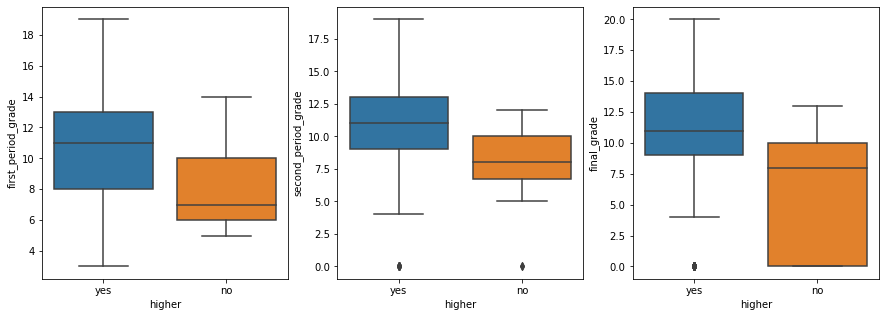

In [72]:
#Impact of aiming for higher education on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='higher', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='higher', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='higher', y='final_grade', ax=ax3)

<AxesSubplot:xlabel='romantic', ylabel='final_grade'>

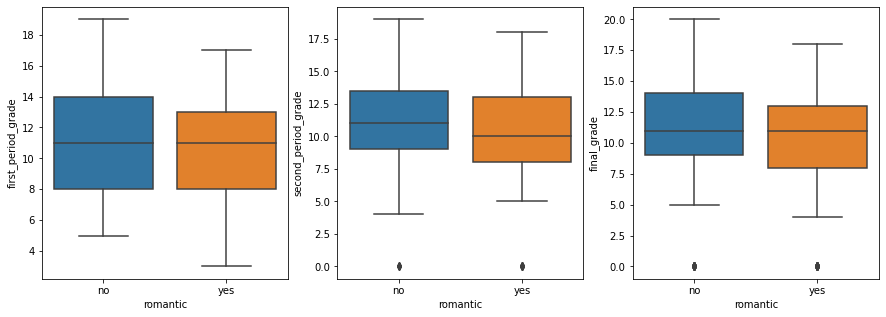

In [78]:
#Impact of being in a romantic relationship on student performance
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.boxplot(data=data, x='romantic', y='first_period_grade', ax=ax1)
sns.boxplot(data=data, x='romantic', y='second_period_grade', ax=ax2)
sns.boxplot(data=data, x='romantic', y='final_grade', ax=ax3)